# Major Project : Building machine Learning Models

## Name: Shreyas Sadashiva Achary 

## Self-Paced Batch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
model = pd.read_csv('cleaned_data.CSV')   #importing the new cleaned data saved as file1.CSV

In [3]:
model

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.000000,1,0,7.2500,1,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,27.000000,0,0,13.0000,1,0,1
885,888,1,1,19.000000,0,0,30.0000,0,0,1
886,889,0,3,29.642093,1,2,23.4500,0,0,1
887,890,1,1,26.000000,0,0,30.0000,1,0,0


In [4]:
model = pd.DataFrame(model,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S','Survived',])

In [5]:
model

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,22.000000,1,0,7.2500,1,0,1,0
1,1,38.000000,1,0,71.2833,0,0,0,1
2,3,26.000000,0,0,7.9250,0,0,1,1
3,1,35.000000,1,0,53.1000,0,0,1,1
4,3,35.000000,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...
884,2,27.000000,0,0,13.0000,1,0,1,0
885,1,19.000000,0,0,30.0000,0,0,1,1
886,3,29.642093,1,2,23.4500,0,0,1,0
887,1,26.000000,0,0,30.0000,1,0,0,1


# Defining X & Y

In [6]:
X=model.iloc[:,:-1].values
Y=model.iloc[:,-1].values

In [7]:
X.shape # 2-D

(889, 8)

In [8]:
Y.shape # single dimension

(889,)

In [9]:
X

array([[ 3.       , 22.       ,  1.       , ...,  1.       ,  0.       ,
         1.       ],
       [ 1.       , 38.       ,  1.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 3.       , 26.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ],
       ...,
       [ 3.       , 29.6420927,  1.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 1.       , 26.       ,  0.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 32.       ,  0.       , ...,  1.       ,  1.       ,
         0.       ]])

In [10]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

# Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

In [12]:
X_train.shape

(666, 8)

In [13]:
X_test.shape

(223, 8)

In [14]:
y_train.shape

(666,)

In [15]:
y_test.shape

(223,)

## Scaling the independant variables

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Building the model

In [17]:
from sklearn.linear_model import LogisticRegression 
logisticRegression=LogisticRegression()
logisticRegression.fit(X_train,y_train)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred=logisticRegression.predict(X_test)

In [19]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [20]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confuse=confusion_matrix(y_test,y_pred)
print(confuse)

[[117  16]
 [ 27  63]]


In [22]:
TP=confuse[1,1]
TN=confuse[0,0]
FP=confuse[0,1]
FN=confuse[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

,0
TP,63
TN,117
FP,16
FN,27


In [23]:
from sklearn import metrics as met
accuracy_logisticRegression=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy_logisticRegression*100)

classification accuracy: 80.71748878923766


In [24]:
print("classification error is :",100*(1-accuracy_logisticRegression))

classification error is : 19.282511210762333


In [25]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

In [26]:
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,70.000000
TNR/SPECIFICITY,87.969925
FPR,12.030075
FNR,30.000000


In [27]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.797468
F1_score,0.745562
roc_auc,0.789850


## The accuracy of the Logistic regression model is 80.71% 

# KNN

## Defining X and Y

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [29]:
pd.DataFrame([X_train.shape , X_test.shape  , y_train.shape  ,  y_test.shape],index=['X_train','X_test','y_train','y_test'],columns=['row','columns'])

,row,columns
X_train,666,8.0
X_test,223,8.0
y_train,666,NaN
y_test,223,NaN


## Scaling the independant variables

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Building the model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Text(0, 0.5, 'mean error')

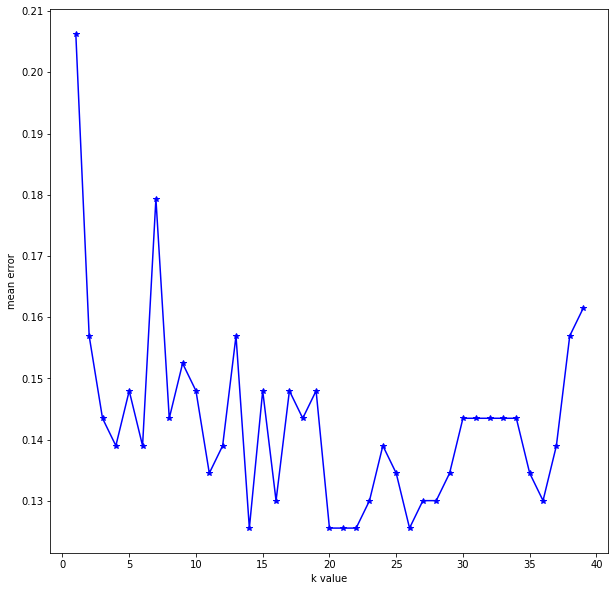

In [32]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    p=knn.predict(X_test)
    error.append(np.mean(p!=y_test))
error
plt.figure(figsize=(10,10))
plt.plot(range(1,40),error,color='b',marker='*')
plt.xlabel('k value')
plt.ylabel('mean error')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [35]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [36]:
accuracy_KNN = round(knn.score(X_train, y_train) * 100, 2)

In [37]:
accuracy_KNN

77.63

## Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
confuse=confusion_matrix(y_test,y_pred)
print(confuse)
TP=confuse[1,1]
TN=confuse[0,0]
FP=confuse[0,1]
FN=confuse[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[135  13]
 [ 23  52]]


,0
TP,52
TN,135
FP,13
FN,23


In [39]:
from sklearn import metrics as met
accuracy_KNN=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy_KNN*100)

classification accuracy: 83.85650224215246


In [40]:
print("classification error is :",100*(1-accuracy_KNN))

classification error is : 16.143497757847534


In [41]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

In [42]:
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,69.333333
TNR/SPECIFICITY,91.216216
FPR,8.783784
FNR,30.666667


In [43]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.800000
F1_score,0.742857
roc_auc,0.802748


# The accuracy of the KNN model is 83.85%

# Decision tree model

## Defining X and Y

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [45]:
pd.DataFrame([X_train.shape , X_test.shape  , y_train.shape  ,  y_test.shape],index=['X_train','X_test','y_train','y_test'],columns=['row','columns'])

,row,columns
X_train,666,8.0
X_test,223,8.0
y_train,666,NaN
y_test,223,NaN


## Scaling the independant variables

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Building the model

In [47]:
from sklearn.tree import DecisionTreeClassifier
dect=DecisionTreeClassifier()
dect.fit(X_train,y_train)
y_pred=dect.predict(X_test)

In [48]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [49]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


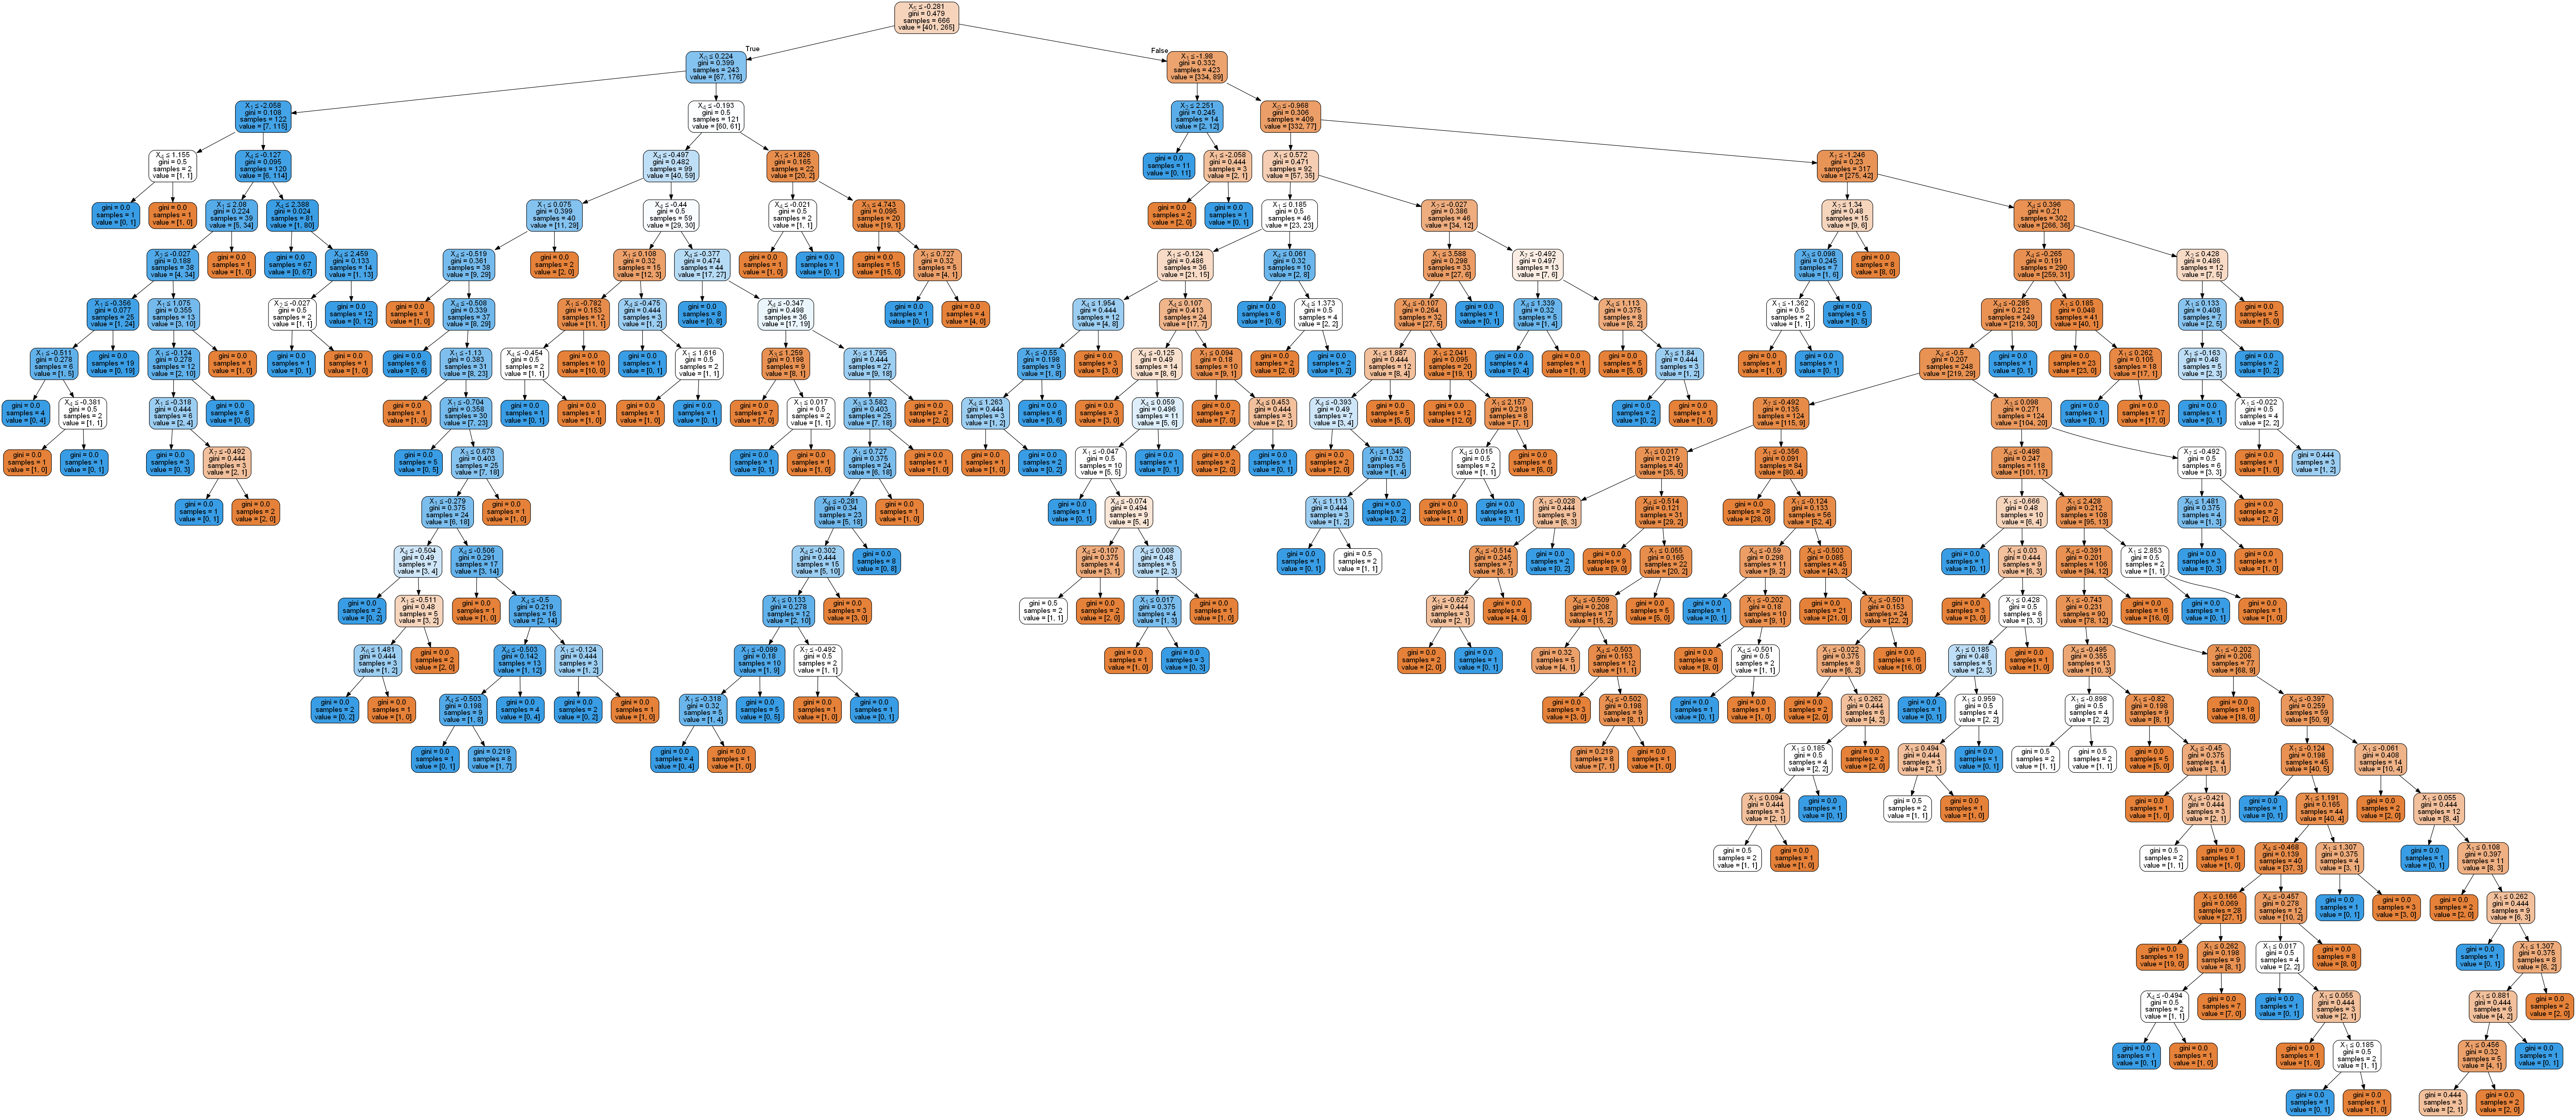

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image   
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO() 
export_graphviz(dect, out_file=dot_data,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=12000, height=12000) 

In [51]:
from sklearn import metrics as met
accuracy_Decision=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy_Decision*100)

classification accuracy: 82.0627802690583


# The accuracy for the decision tree model is 81.16%

# Random Forrest model

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [53]:
pd.DataFrame([X_train.shape , X_test.shape  , y_train.shape  ,  y_test.shape],index=['X_train','X_test','y_train','y_test'],columns=['row','columns'])

,row,columns
X_train,666,8.0
X_test,223,8.0
y_train,666,NaN
y_test,223,NaN


# Scaling X and Y

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Building the model

In [55]:
from sklearn.ensemble import RandomForestClassifier
randF=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=6)
randF.fit(X_train,y_train)
y_pred=randF.predict(X_test)

In [56]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [57]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix
confuse=confusion_matrix(y_test,y_pred)
print(confuse)
TP=confuse[1,1]
TN=confuse[0,0]
FP=confuse[0,1]
FN=confuse[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[131  17]
 [ 20  55]]


,0
TP,55
TN,131
FP,17
FN,20


In [59]:
from sklearn import metrics as met
accuracy_randomForrest=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy_randomForrest*100)

classification accuracy: 83.40807174887892


# The accuracy of the Random Forrest model is 83.40%

# Comparing accuracies to find the best model

In [60]:
results = pd.DataFrame({'Model': [ 'KNN', 'Logistic Regression','Decision Tree','Random Forrest'],
                        'Score': [ accuracy_KNN, accuracy_logisticRegression, accuracy_Decision, accuracy_randomForrest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.838565,KNN
0.834081,Random Forrest
0.820628,Decision Tree
0.807175,Logistic Regression


# KNN model is more accurate, Therefore  it is the best model